In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

<ipython-input-2-cde6ab162d36>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


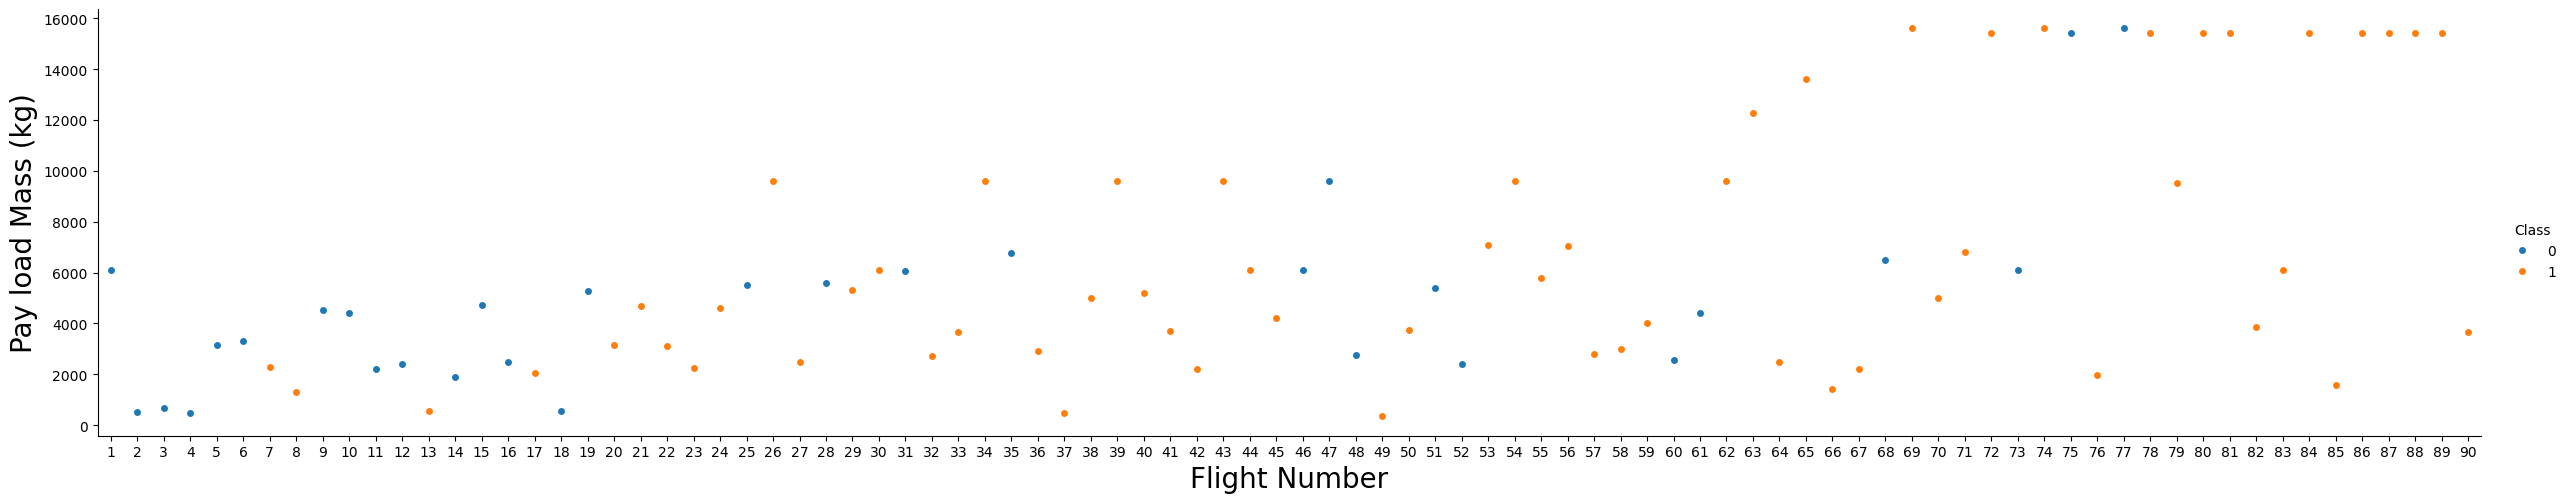

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

In [6]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

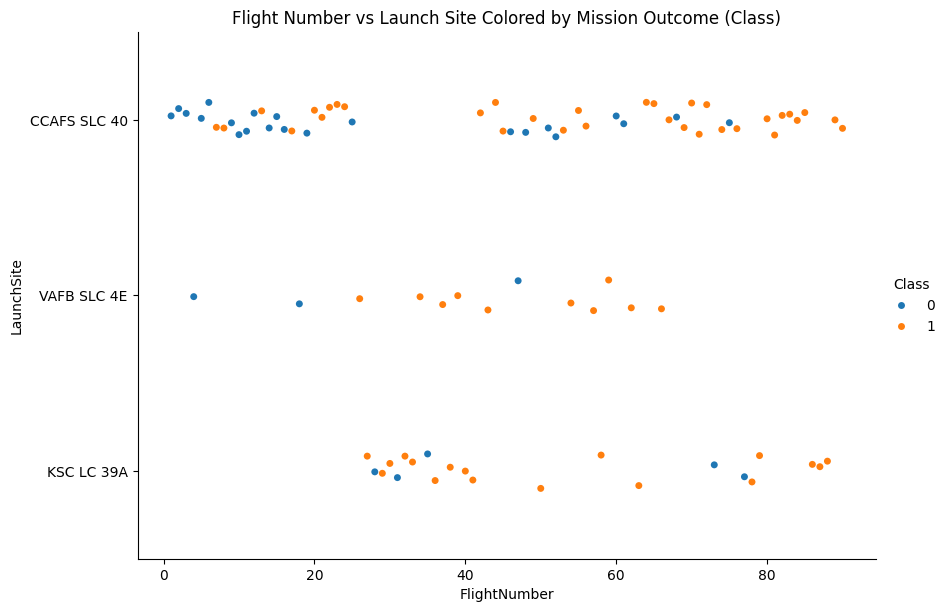

In [7]:
# task 1
import seaborn as sns
import matplotlib.pyplot as plt

# Use seaborn's catplot to visualize Flight Number vs Launch Site colored by Class
sns.catplot(
    data=df,
    x="FlightNumber",
    y="LaunchSite",
    hue="Class",          # Use correct case-sensitive column name
    kind="strip",         # Strip plot for scatter effect
    height=6,
    aspect=1.5
)

# Add a title
plt.title("Flight Number vs Launch Site Colored by Mission Outcome (Class)")
plt.show()


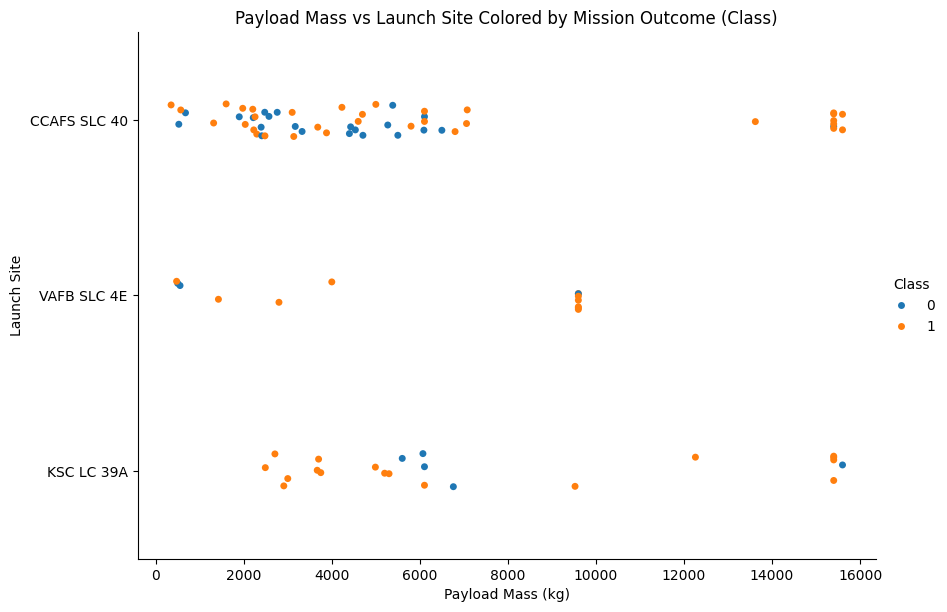

In [8]:
# task 2
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Payload Mass vs Launch Site colored by mission success (Class)
sns.catplot(
    data=df,
    x="PayloadMass",
    y="LaunchSite",
    hue="Class",
    kind="strip",       # strip plot gives scatter-style visuals
    height=6,
    aspect=1.5
)

# Add a title
plt.title("Payload Mass vs Launch Site Colored by Mission Outcome (Class)")
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Launch Site")
plt.show()


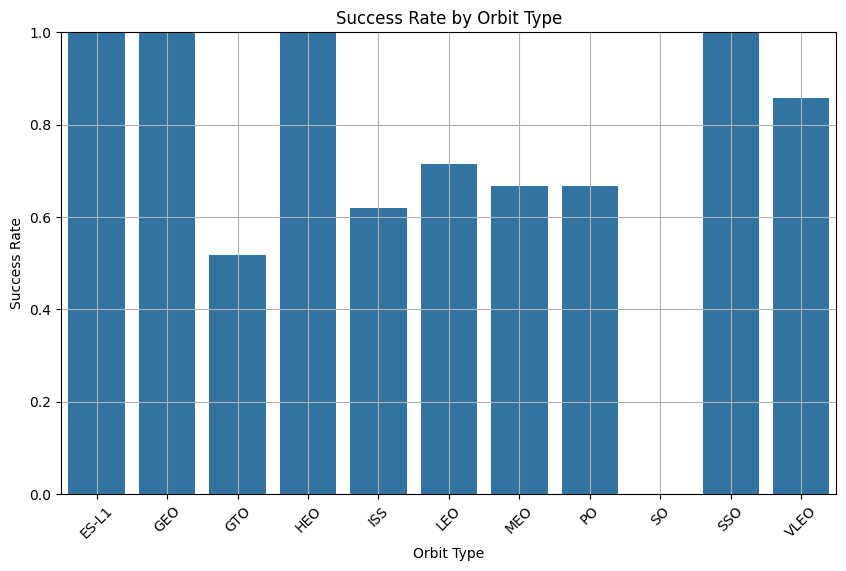

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group by Orbit and calculate the mean of Class (success rate)
orbit_success = df.groupby("Orbit")["Class"].mean().reset_index()

# Step 2: Plot the bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=orbit_success, x="Orbit", y="Class")

# Add labels and title
plt.title("Success Rate by Orbit Type")
plt.ylabel("Success Rate")
plt.xlabel("Orbit Type")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Since it's a rate (0 to 1)
plt.grid(True)
plt.show()


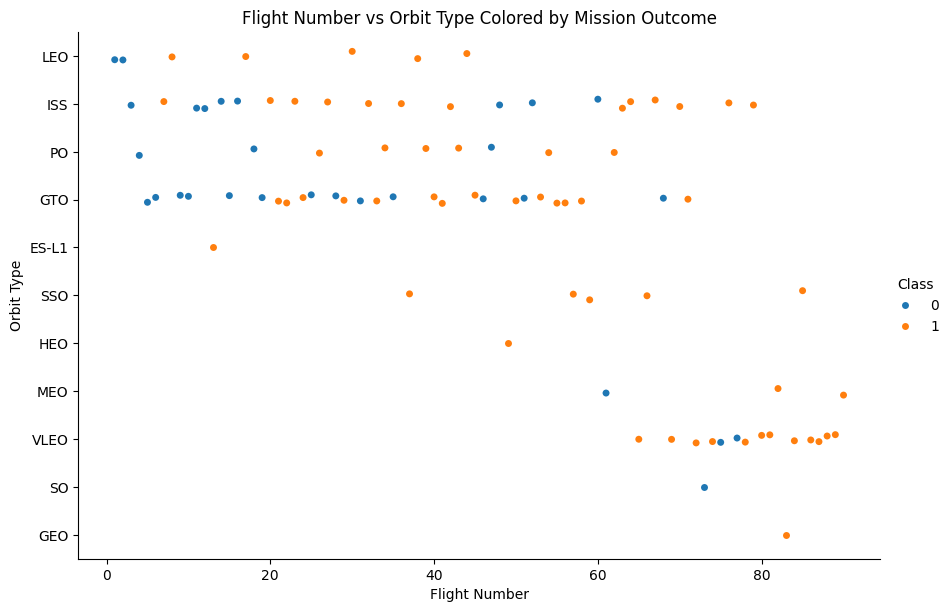

In [10]:
# task 4
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter-style plot using catplot
sns.catplot(
    data=df,
    x="FlightNumber",
    y="Orbit",
    hue="Class",
    kind="strip",       # strip plot for scatter effect
    height=6,
    aspect=1.5
)

# Add labels and title
plt.title("Flight Number vs Orbit Type Colored by Mission Outcome")
plt.xlabel("Flight Number")
plt.ylabel("Orbit Type")
plt.show()


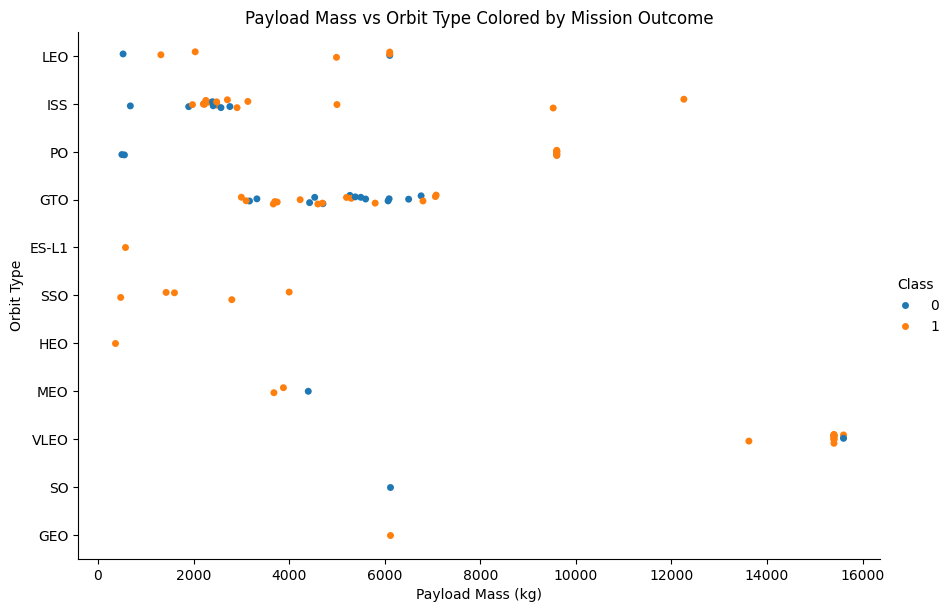

In [11]:
# task 5
import seaborn as sns
import matplotlib.pyplot as plt

# Create a strip plot (scatter-style) to show PayloadMass vs Orbit
sns.catplot(
    data=df,
    x="PayloadMass",
    y="Orbit",
    hue="Class",
    kind="strip",
    height=6,
    aspect=1.5
)

# Add labels and title
plt.title("Payload Mass vs Orbit Type Colored by Mission Outcome")
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Orbit Type")
plt.show()


In [12]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


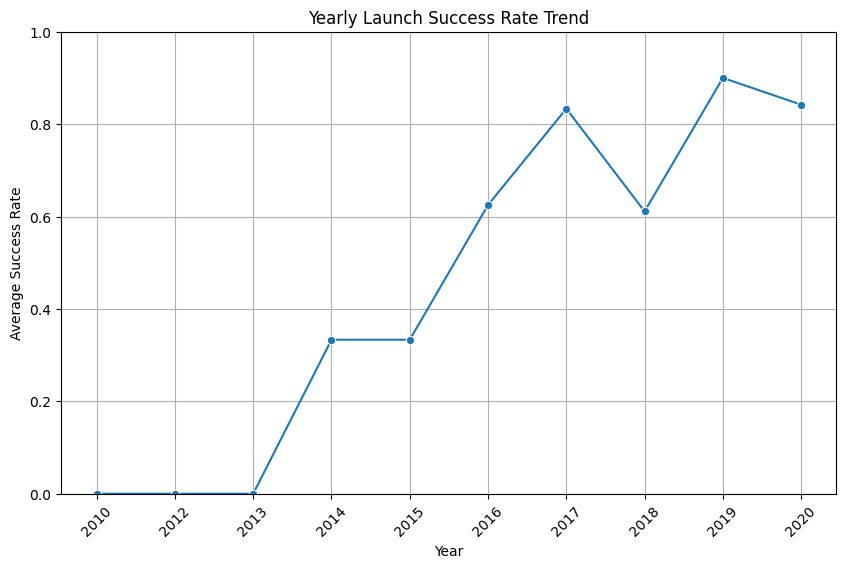

In [13]:
# task 6
# Extract year from the Date column
df["Year"] = df["Date"].apply(lambda x: x.split("-")[0])


# Group by year and compute mean of Class (success rate)
yearly_success = df.groupby("Year")["Class"].mean().reset_index()


import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_success, x="Year", y="Class", marker="o")

# Labels and title
plt.title("Yearly Launch Success Rate Trend")
plt.xlabel("Year")
plt.ylabel("Average Success Rate")
plt.ylim(0, 1)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [14]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [15]:
# task 7

In [16]:
# Apply one-hot encoding to the categorical columns
features_one_hot = pd.get_dummies(
    features, 
    columns=["Orbit", "LaunchSite", "LandingPad", "Serial"]
)

# Display the encoded feature DataFrame
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
# task 8
# Convert all columns in the DataFrame to float64
features_one_hot = features_one_hot.astype('float64')

# Save the processed dataset for the next lab
features_one_hot.to_csv('dataset_part_3.csv', index=False)
